<a href="https://colab.research.google.com/github/kimdfarm/2025-1-myclass-BDA/blob/main/inclass/07w_B_wed_0416_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단원 07 데이터 정제

In [29]:
import pandas as pd
import numpy as np

df= pd.DataFrame({'sex':["M" , "F", np.nan , "M","F"] , 'score':[5,4,3,4,None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [30]:
df['score'] +1

,score
0,6.0
1,5.0
2,4.0
3,5.0
4,NaN


In [31]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [32]:
pd.isnull(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [33]:
df.isnull()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [34]:
pd.isnull(df).sum()

,0
sex,1
score,1


In [35]:
pd.isnull(df).sum(axis=0)

,0
sex,1
score,1


In [36]:
pd.isnull(df).sum(axis='index')

,0
sex,1
score,1


In [37]:
pd.isnull(df).sum(axis=1)

,0
0,0
1,0
2,1
3,0
4,1


In [38]:
pd.isnull(df).sum(axis='columns')

,0
0,0
1,0
2,1
3,0
4,1


In [39]:
s = pd.Series([True, False , True])
s

,0
0,True
1,False
2,True


In [40]:
s.sum()

np.int64(2)

In [41]:
s.any()

np.True_

In [42]:
s.all()

np.False_

In [43]:
df.isnull()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [44]:
df.isnull().any()

,0
sex,True
score,True


In [45]:
df.isna().any()

,0
sex,True
score,True


In [49]:
df.isna().all()

,0
sex,False
score,False


In [47]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [48]:
df.notnull().any()

,0
sex,True
score,True


In [50]:
df.notnull().all()

,0
sex,False
score,False


In [51]:
df.notna().all()

,0
sex,False
score,False


In [52]:
df.isna().any(axis=0)

,0
sex,True
score,True


In [53]:
df.isna().any(axis=1)

,0
0,False
1,False
2,True
3,False
4,True


In [55]:
~df.isna().any(axis=1)

,0
0,True
1,True
2,False
3,True
4,False


In [54]:
df.notna().any(axis=1)

,0
0,True
1,True
2,True
3,True
4,True


In [56]:
~df.notna().any(axis=1)

,0
0,False
1,False
2,False
3,False
4,False


In [57]:
df.isna().any(axis=1)

,0
0,False
1,False
2,True
3,False
4,True


In [58]:
# 적어도 하나 있으면 그 행을 추출, 실험 예상
df[df.isna().any(axis=1)]

,sex,score
2,NaN,3.0
4,F,NaN


In [59]:
df[~df.isna().any(axis=1)]

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


## 결측 값 시간 값

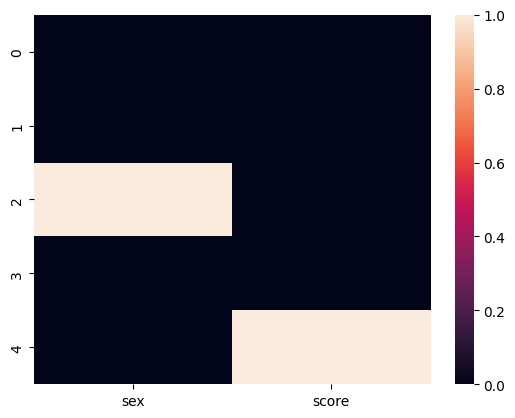

In [62]:
import seaborn as sns

sns.heatmap(df.isnull());

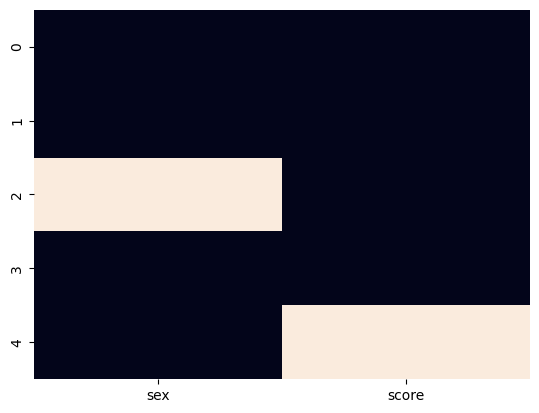

In [65]:
sns.heatmap(df.isnull(),cbar=False);

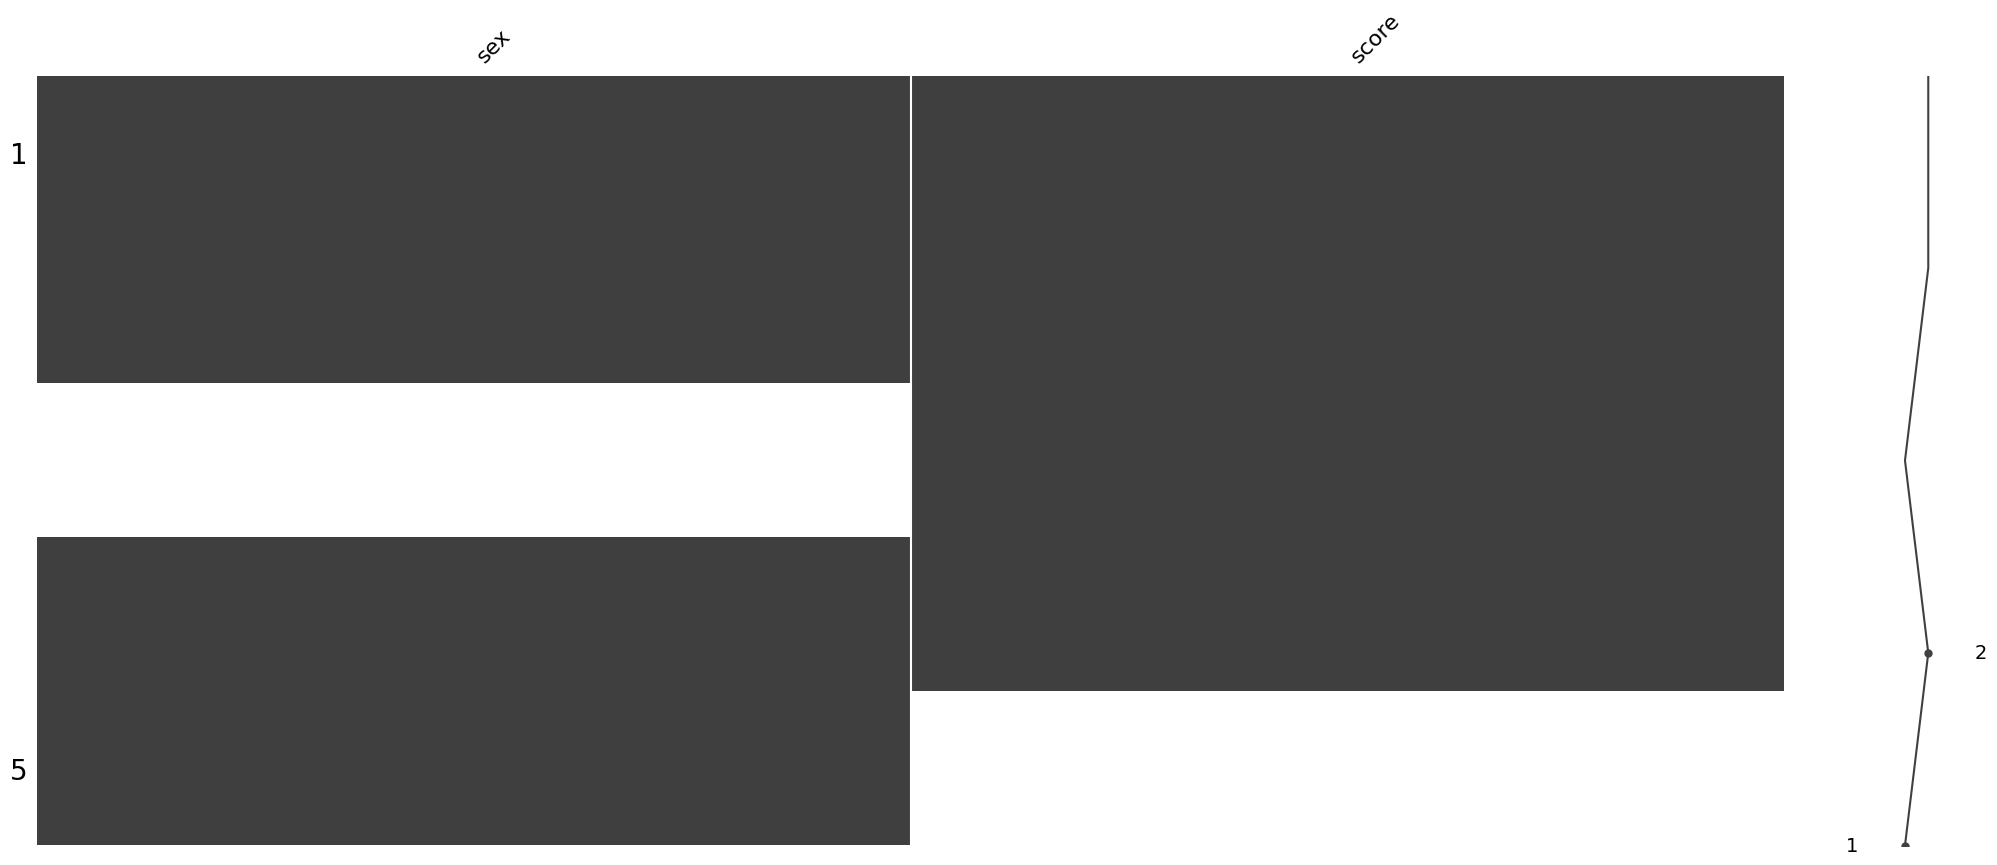

In [66]:
import missingno as msno

msno.matrix(df);

In [68]:
tdf = sns.load_dataset('titanic')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


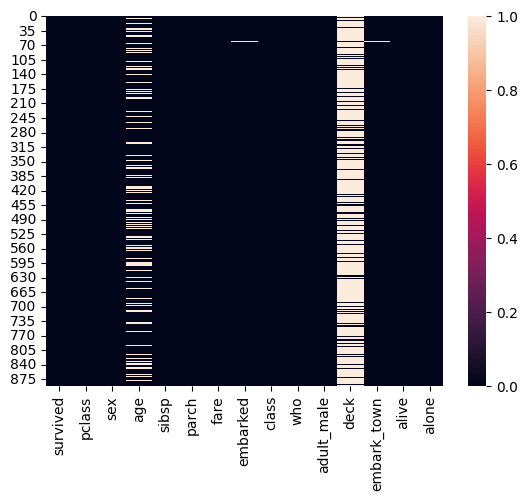

In [69]:
sns.heatmap(tdf.isnull());

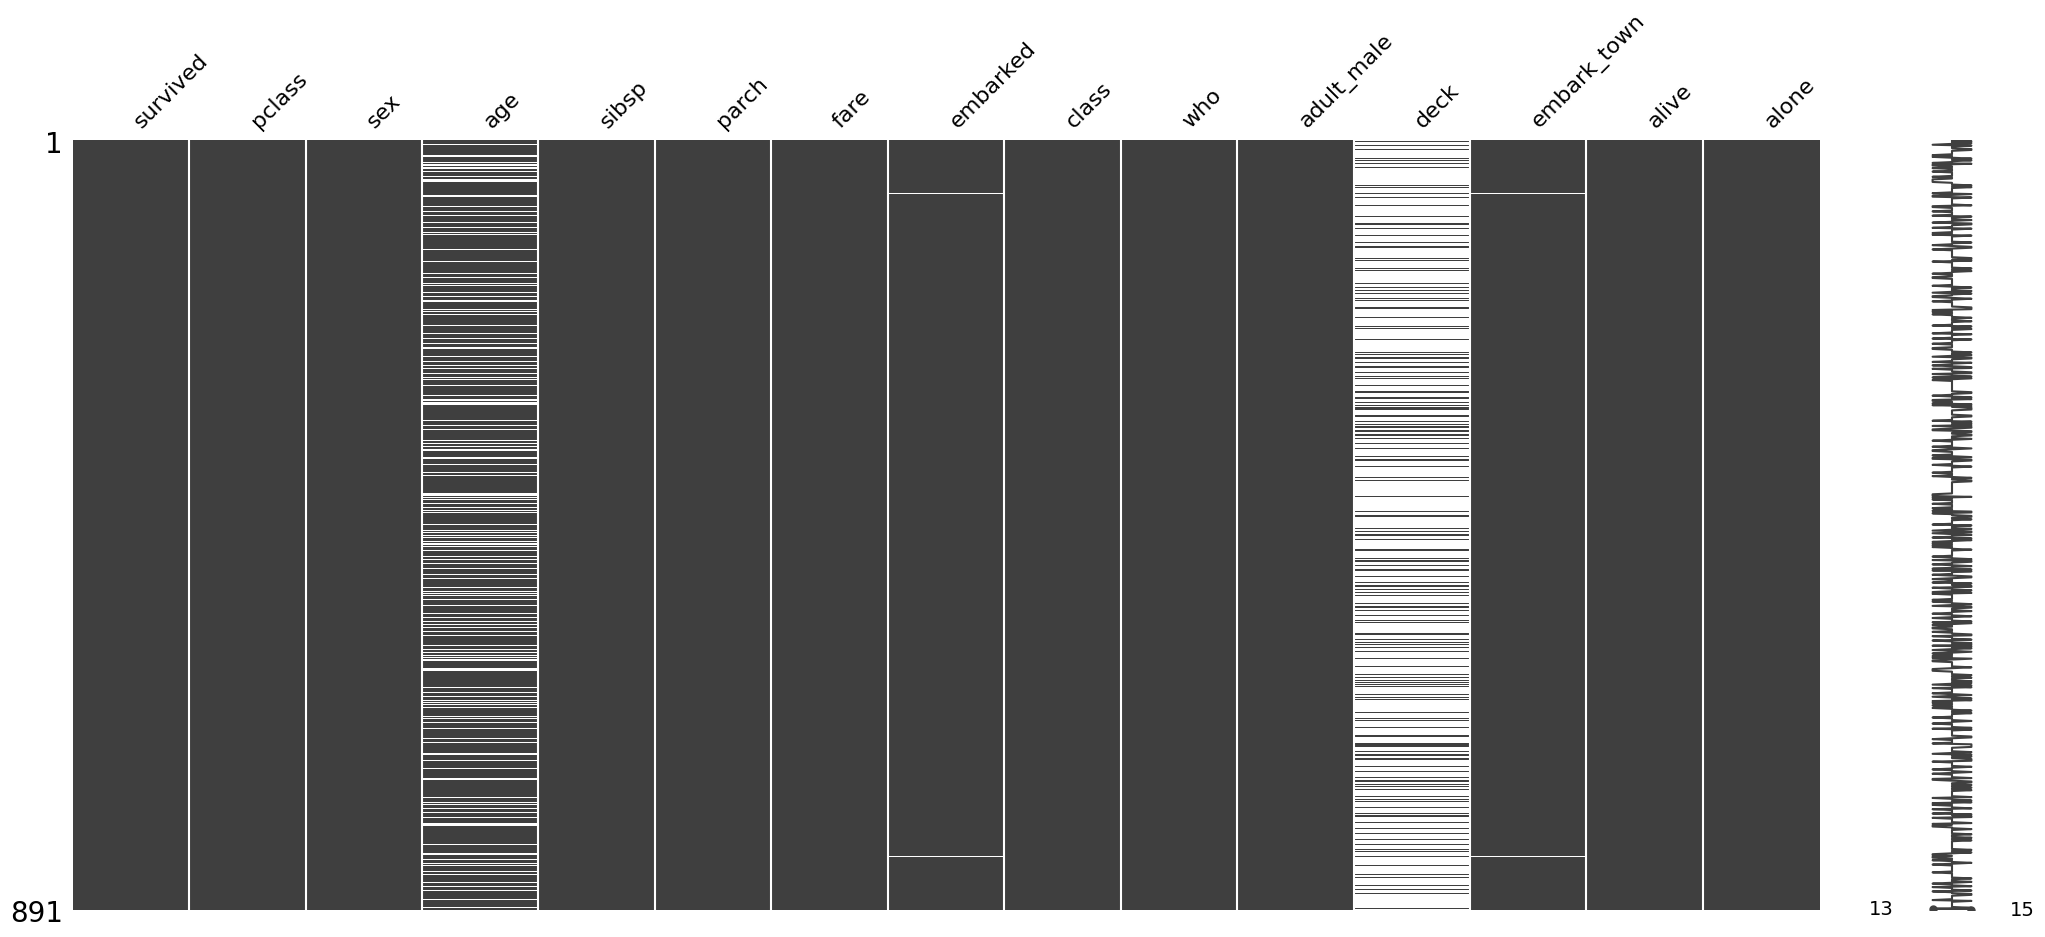

In [70]:
msno.matrix(tdf);

## 오른쪽 스피크 라인은 데이터 완성도의 일반적인 모형을 요약하고 데이터 널링이 있는 행을 가리킵니다.

- 행마다 15개 중 NaN이 아닌 유효헌 데이터의 갯수를 나타내고
- 그 점을 다음 행과 연결한 선

In [72]:
tdf2 = tdf.sample(5)

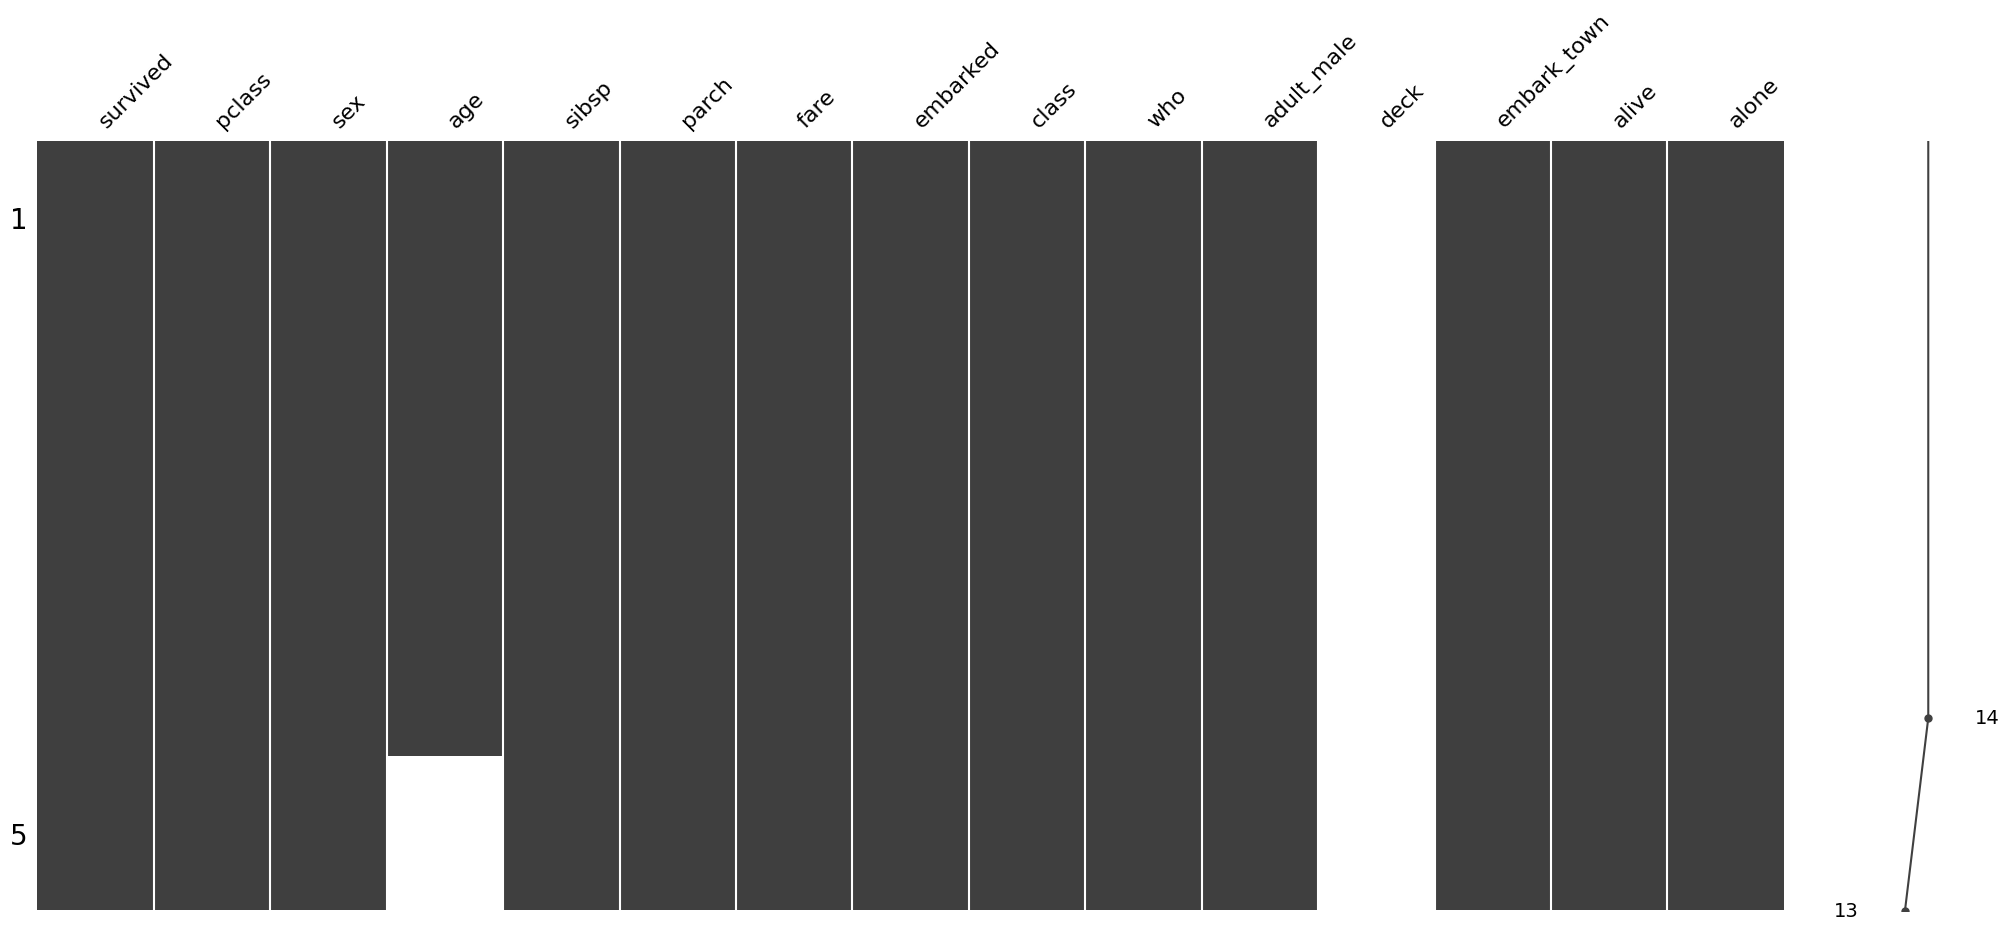

In [73]:
msno.matrix(tdf2);

In [74]:
# NaN이 1개인 행을 추출
tdf[tdf.isna().sum(axis=1)==1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


In [75]:
tdf[tdf.isna().sum(axis=1)==2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [76]:
tdf[tdf.isna().sum(axis=1)==3]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


<Axes: >

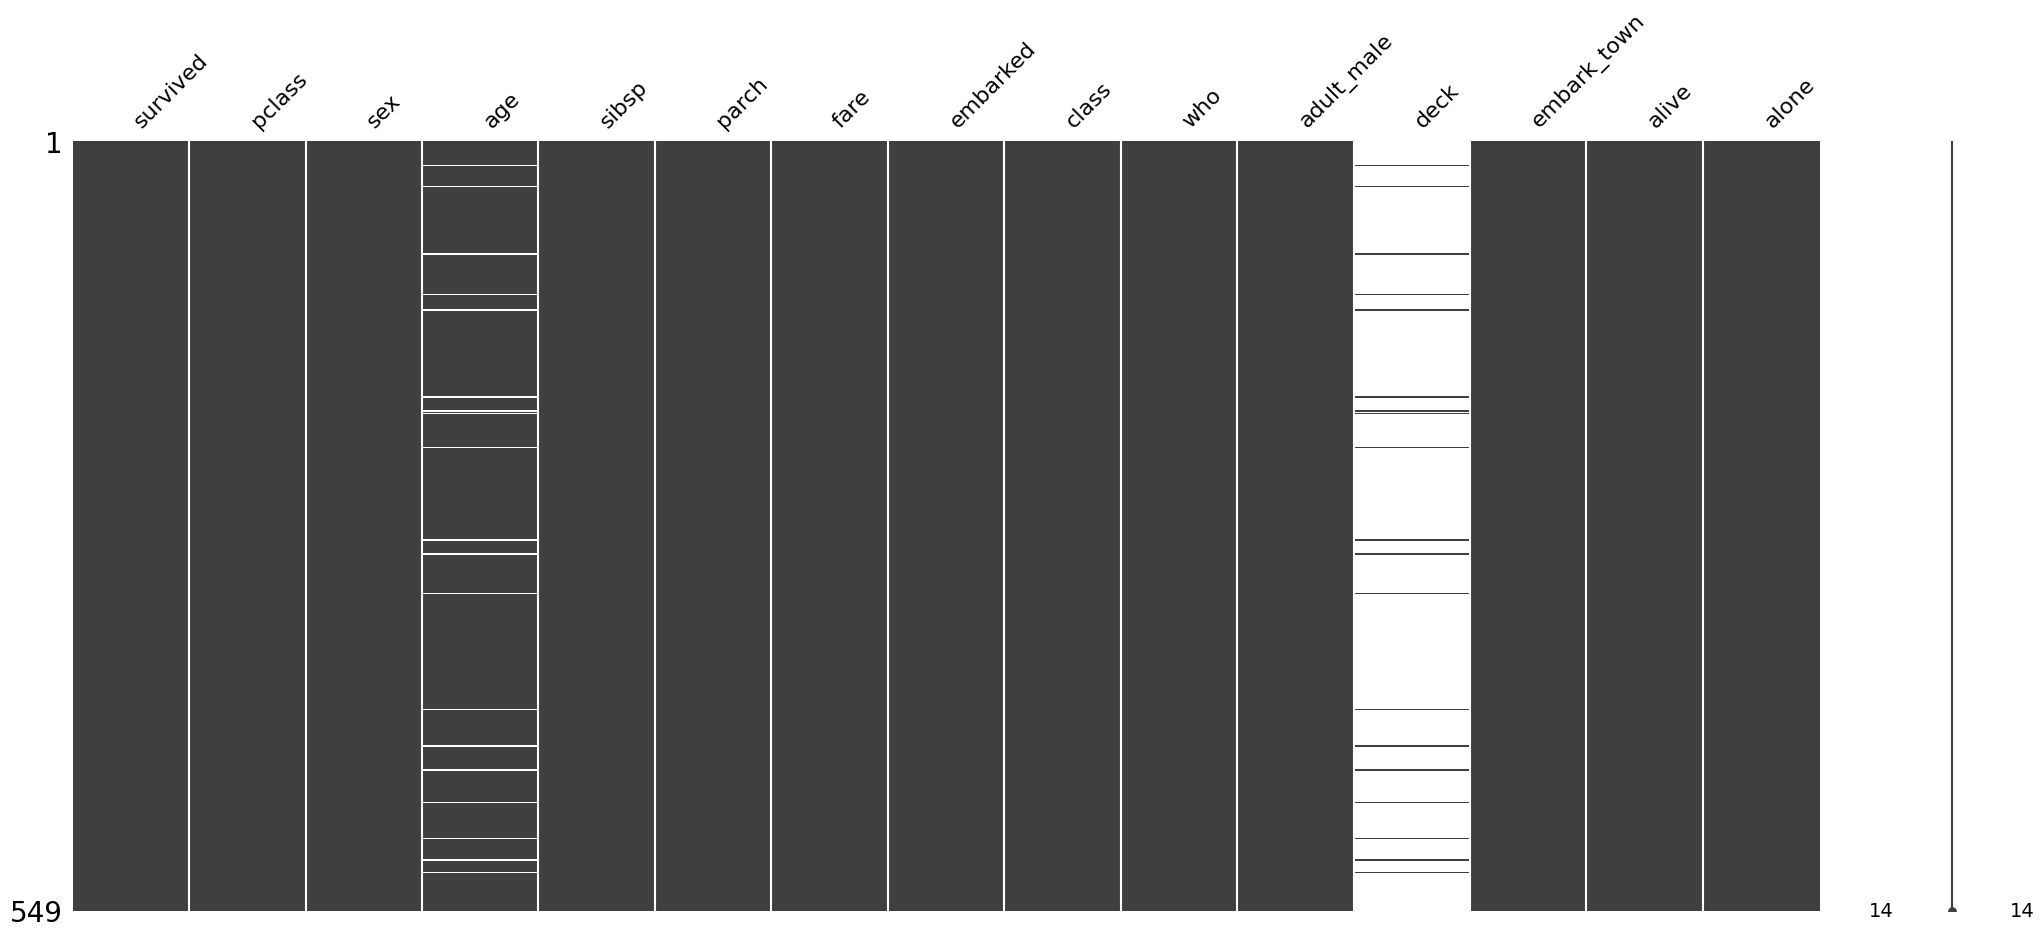

In [77]:
msno.matrix(tdf[tdf.isna().sum(axis=1)==1])

In [79]:
tdf[tdf.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [81]:
#두 열이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) &(tdf.deck.isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [82]:
#세 열이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) &(tdf.deck.isna() & tdf.embarked.isna() )]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [84]:
tdf[tdf.isna().any(axis=1)]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


<Axes: >

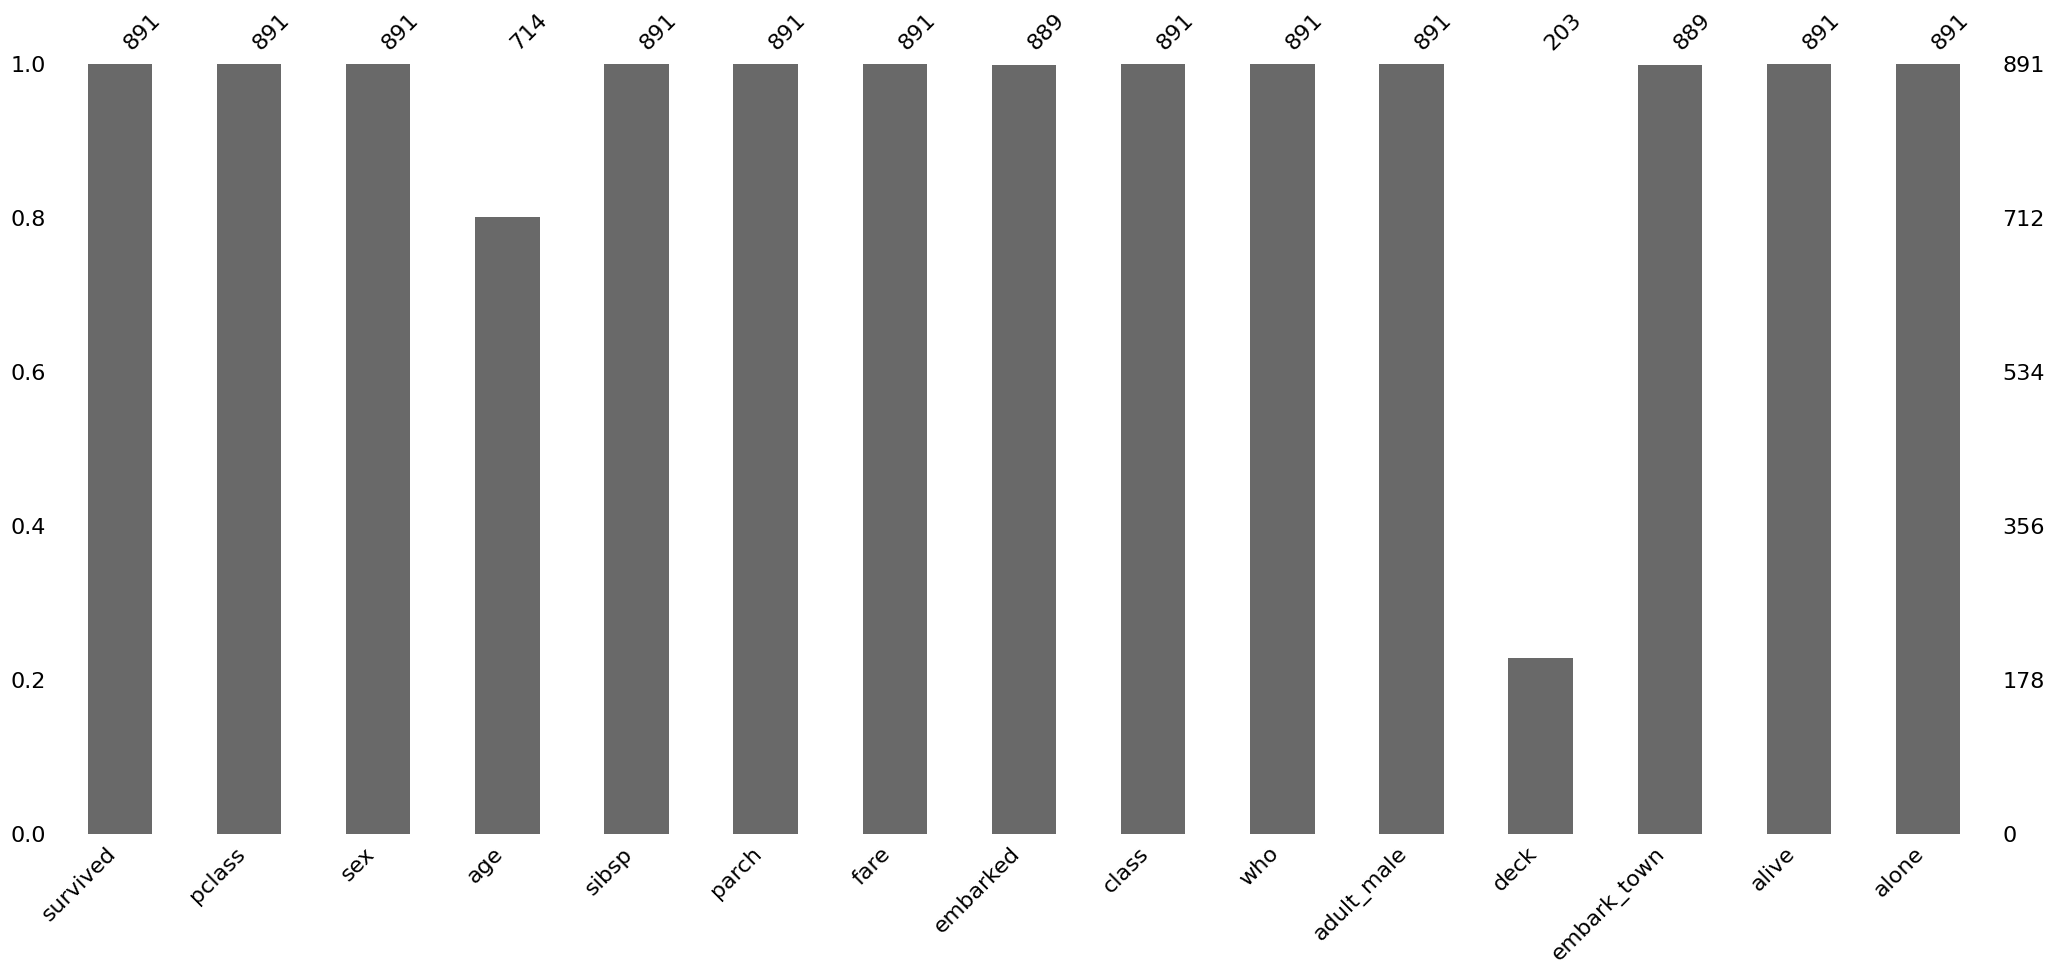

In [85]:
msno.bar(tdf)

<Axes: >

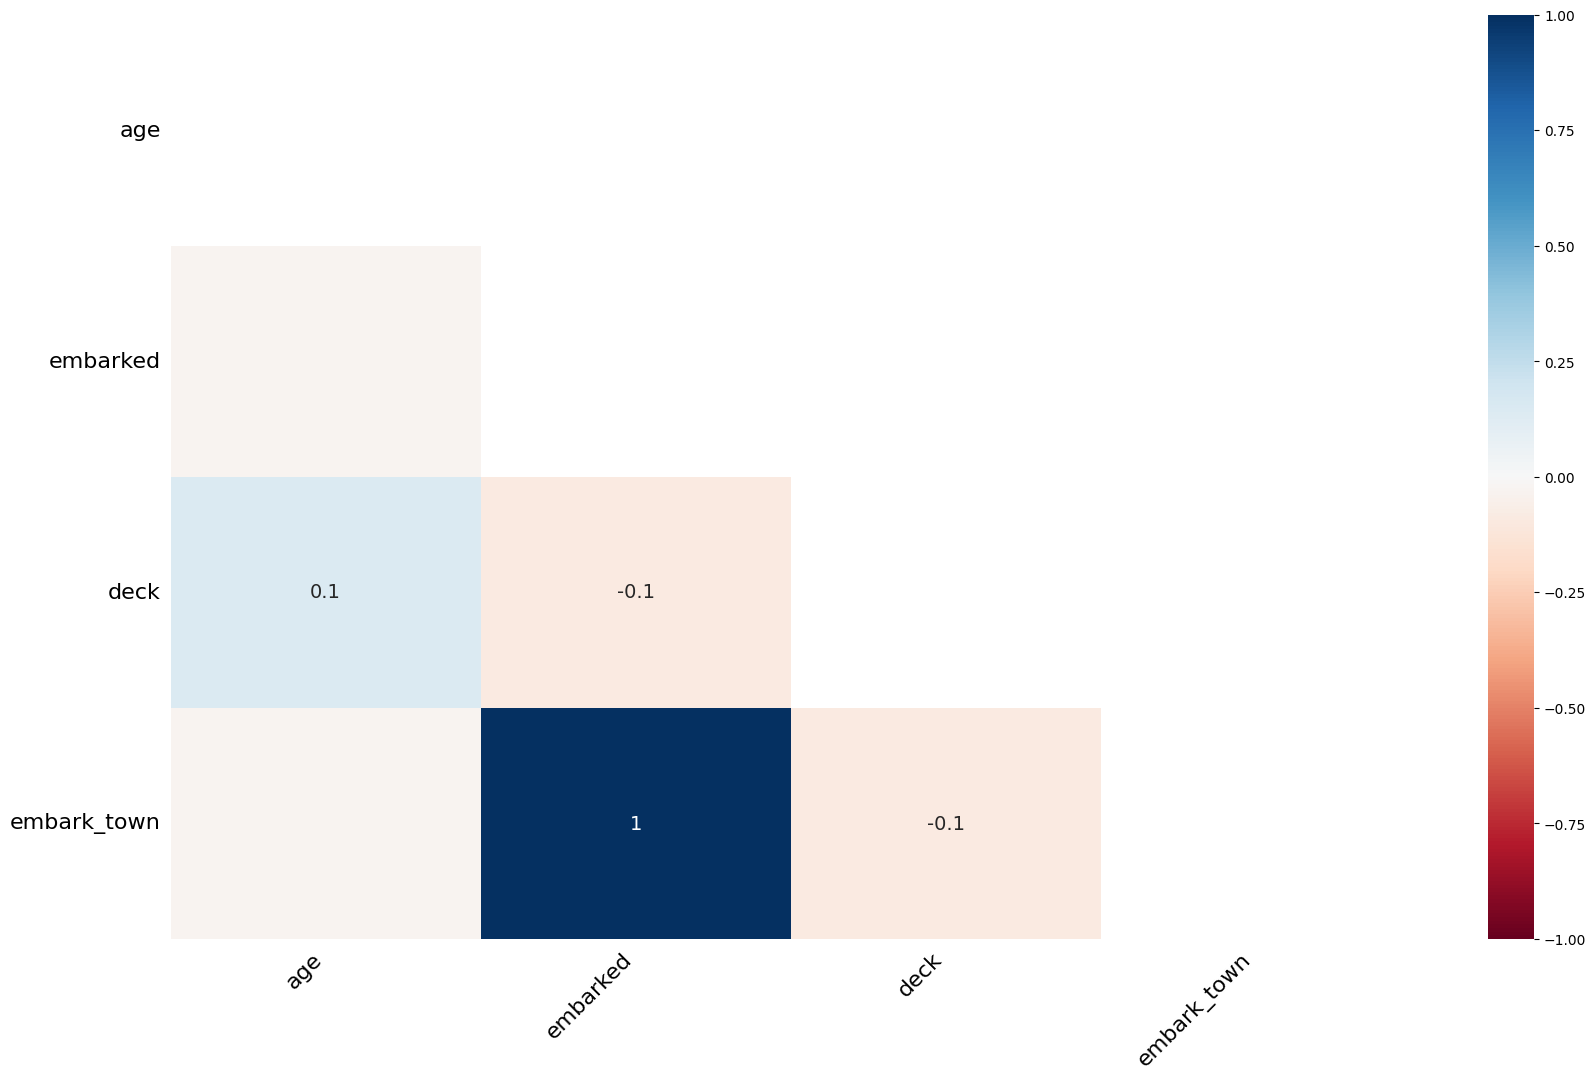

In [86]:
msno.heatmap(tdf)